IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression



[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
# Load dataset
df = pd.read_csv("C:/Users/jasmi/OneDrive/Documents/flipkart.csv")
df.head()



,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [23]:
#PREPROCESSING THE DATA

In [3]:
df.shape

(9999, 6)

In [4]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   9999 non-null   object
 1   product_price  9999 non-null   int64 
 2   Rate           9999 non-null   int64 
 3   Review         9999 non-null   object
 4   Summary        9999 non-null   object
 5   Sentiment      9999 non-null   object
dtypes: int64(2), object(4)
memory usage: 468.8+ KB


In [6]:
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [7]:
df=df.drop(["product_name","product_price","Summary"],axis=1)
df

,Rate,Review,Sentiment
0,5,super!,positive
1,5,awesome,positive
2,3,fair,positive
3,1,useless product,negative
4,3,fair,neutral
...,...,...,...
9994,4,delightful,positive
9995,5,awesome,neutral
9996,5,terrific,positive
9997,4,nice product,positive


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()
def get_sentiment_category(scores):
    compound_score = scores['compound']
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'review' column and add a new column for sentiment category
df['sentiment_category'] = df['Review'].apply(lambda x: get_sentiment_category(sia.polarity_scores(x)))
df['sentiment_category']


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9994    positive
9995    positive
9996    positive
9997    positive
9998    positive
Name: sentiment_category, Length: 9999, dtype: object

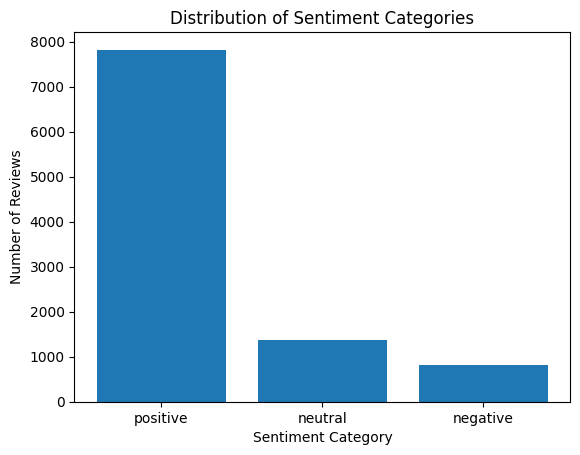

In [9]:
# Count the number of reviews for each sentiment category
category_counts = df['sentiment_category'].value_counts()

# Set up the bar chart
fig, ax = plt.subplots()
ax.bar(category_counts.index, category_counts.values)

# Add labels and titles
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Number of Reviews')
ax.set_title('Distribution of Sentiment Categories')

# Show the plot
plt.show()

In [10]:
# Preprocessing
df['Review'] = df['Review'].apply(lambda x: x.lower()) # convert to lowercase
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.isalpha()])) # remove non-alphabetic characters
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word in stop_words])) # remove stop words


In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'],df['Sentiment'], test_size=0.2, random_state=42)


In [12]:
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

The objective "binary:logistic" is a parameter setting used in XGBoost, which is a popular machine learning algorithm for classification and regression problems. This objective function is specifically used for binary classification problems, where the goal is to predict the probability of an input belonging to one of two classes.

The "binary" part of the objective function refers to the fact that there are only two classes, and "logistic" refers to the logistic regression model used to estimate the probability of the positive class. In other words, the binary:logistic objective function optimizes the log loss of the logistic regression model.

RANDOM FOREST AND XG BOOST

In [13]:
# Ensembling with Random Forest and XGBoost classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = xgb.XGBClassifier(max_depth=7, learning_rate=0.1, n_estimators=100, objective='binary:logistic', random_state=42)
ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_clf)], voting='soft')
ensemble.fit(X_train_tfidf, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...))],
                 voting='soft')

In [14]:
# Prediction
y_pred = ensemble.predict(X_test_tfidf)
y_pred


array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [15]:
# Evaluation
print(' Random forest Accuracy:', accuracy_score(y_test, y_pred))


 Random forest Accuracy: 0.908


In [16]:
pip install TextBlob


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#import necessary libraries
import pandas as pd
from textblob import TextBlob

In [18]:
# Define a function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the review text and store the results in a new column
df['Sentiment'] = df['Review'].apply(get_sentiment)

# Convert the sentiment values into binary (0 for negative and 1 for positive)
df.loc[df['Sentiment'] <= 0, 'Sentiment'] = 0
df.loc[df['Sentiment'] > 0, 'Sentiment'] = 1

# Print the first 10 rows of the DataFrame to check the results
print(df.head(10))


   Rate              Review  Sentiment sentiment_category
0     5               super        1.0           positive
1     5             awesome        1.0           positive
2     3                fair        1.0           positive
3     1     useless product        0.0           negative
4     3                fair        1.0           positive
5     5             awesome        1.0           positive
6     5  highly recommended        1.0           positive
7     3                nice        1.0           positive
8     1      unsatisfactory        0.0            neutral
9     4         worth money        1.0           positive


NAIVE BAYES

In [ ]:
# Train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Predict on testing set
nb_pred = nb_clf.predict(x_test)
nb_pred

array([0., 0., 1., ..., 0., 1., 0.])

In [ ]:
# Evaluate model performance
nb_acc = accuracy_score(y_test, nb_pred)
nb_acc
print(f"Naive Bayes accuracy: {nb_acc:.2f}")

Naive Bayes accuracy: 0.97


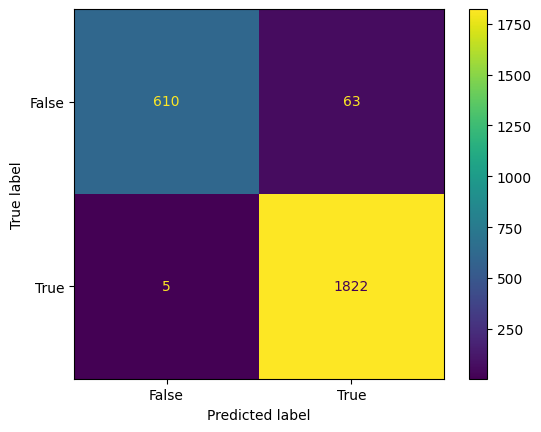

In [ ]:
from sklearn import metrics
cm = confusion_matrix(y_test,nb_pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()

LOGISTIC REGRESSION

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
# Split data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Extract features from text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(train_data['Review'].values.astype('U'))
test_features = vectorizer.transform(test_data['Review'].values.astype('U'))

# Define labels
train_labels = train_data['Sentiment'].values
test_labels = test_data['Sentiment'].values

In [36]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(train_features, train_labels)

# Make predictions on test data
predictions = lr.predict(test_features)

# Evaluate model performance
accuracy = accuracy_score(test_labels, predictions)
confusion = confusion_matrix(test_labels, predictions)

print('Accuracy:', accuracy)
print('Confusion matrix:')
print(confusion)

Accuracy: 0.7485
Confusion matrix:
[[  23  503]
 [   0 1474]]
